# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Suppress Scientific Notation
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading the Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Carlosrnes/group_work_ml/main/techscape-ecommerce/train.csv')

# Metadata

**Access ID** - Unique identification of the user access to the website
Date Website visit date.

**AccountMng Pages** - Number of pages visited by the user about account
management.

**AccountMng Duration** - Total amount of time (seconds) spent by the user on
account management related pages.

**FAQ Pages** - Number of pages visited by the user about frequently
asked questions, shipping information and company
related pages.

**FAQ Duration** - Total amount of time (seconds) spent by the user on
FAQ pages.

**Product Pages** - Number of pages visited by the user about products and
services offered by the company.

**Product Duration** - Total amount in time (seconds) spent by the user on
products and services related pages.

**GoogleAnalytics BounceRate** - Average bounce rate value of the pages visited by the user, provided by google analytics.

**GoogleAnalytics ExitRate** - Average exit rate value of the pages visited by the user, provided by google analytics.

**GoogleAnalytics PageValue** - Average page value of the pages visited by the user, provided by google analytics.

**OS** - Operating System of the user.

**Browser** - Browser used to access the webpage.

**Country** - The country of the user.

**Type of Traffic** - Traffic Source by which the user has accessed the website
(e.g., email, banner, direct).

**Type of Visitor** - User type as ”New access”, ”Returner” or ”Other”.

**Buy** - Class label indicating if the user finalized their actions
in the website with a transaction. (Only available in train dataset)


# Initial Analysis

In [3]:
# dataset head
df.head(5)

Access_ID       Date  AccountMng_Pages  ...  Type_of_Traffic  Type_of_Visitor  Buy
0  102863333  21-Mar-20                 0  ...                1         Returner    0
1  103117814  20-May-20                 0  ...                6         Returner    0
2  103201891   4-Dec-20                 0  ...                1         Returner    0
3  103226087  22-Dec-20                 0  ...                2         Returner    1
4  103234445  24-Nov-20                 0  ...                3         Returner    1

[5 rows x 17 columns]

In [4]:
# dataset data types
df.dtypes

Access_ID                       int64
Date                           object
AccountMng_Pages                int64
AccountMng_Duration           float64
FAQ_Pages                       int64
FAQ_Duration                  float64
Product_Pages                   int64
Product_Duration              float64
GoogleAnalytics_BounceRate    float64
GoogleAnalytics_ExitRate      float64
GoogleAnalytics_PageValue     float64
OS                             object
Browser                         int64
Country                        object
Type_of_Traffic                 int64
Type_of_Visitor                object
Buy                             int64
dtype: object

In [5]:
# count of missing values
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [6]:
# duplicated observations
df.duplicated().sum()

0

In [7]:
# descriptive statistics
df.describe().T

count          mean  ...           75%           max
Access_ID                   9999.0  4.519728e+08  ...  6.259756e+08  7.984440e+08
AccountMng_Pages            9999.0  2.324232e+00  ...  4.000000e+00  2.700000e+01
AccountMng_Duration         9999.0  8.120585e+01  ...  9.220835e+01  3.398750e+03
FAQ_Pages                   9999.0  5.080508e-01  ...  0.000000e+00  2.400000e+01
FAQ_Duration                9999.0  3.455910e+01  ...  0.000000e+00  2.549375e+03
Product_Pages               9999.0  3.168587e+01  ...  3.800000e+01  7.050000e+02
Product_Duration            9999.0  1.199769e+03  ...  1.470271e+03  6.397352e+04
GoogleAnalytics_BounceRate  9999.0  2.230545e-02  ...  1.680000e-02  2.000000e-01
GoogleAnalytics_ExitRate    9999.0  4.318147e-02  ...  5.000000e-02  2.000000e-01
GoogleAnalytics_PageValue   9999.0  5.963120e+00  ...  0.000000e+00  3.617637e+02
Browser                     9999.0  2.352535e+00  ...  2.000000e+00  1.300000e+01
Type_of_Traffic             9999.0  3.957496e+00  ...  4.000000e+00  1.500000e+01
Buy                         9999.0  1.552155e-01  ...  0.000000e+00  1.000000e+00

[13 rows x 8 columns]

# Visual Exploration

In [8]:
# Drop Access_ID
df = df.drop(['Access_ID'], axis=1)

# Converting Date type from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y') 

#Define metric and non-metric features.
non_metric_features = ['Date', 'OS',	'Browser',	'Country',	'Type_of_Traffic',	'Type_of_Visitor', 'Buy']
metric_features = df.columns.drop(non_metric_features).to_list()

## Numeric Variables' Univariate Distribution

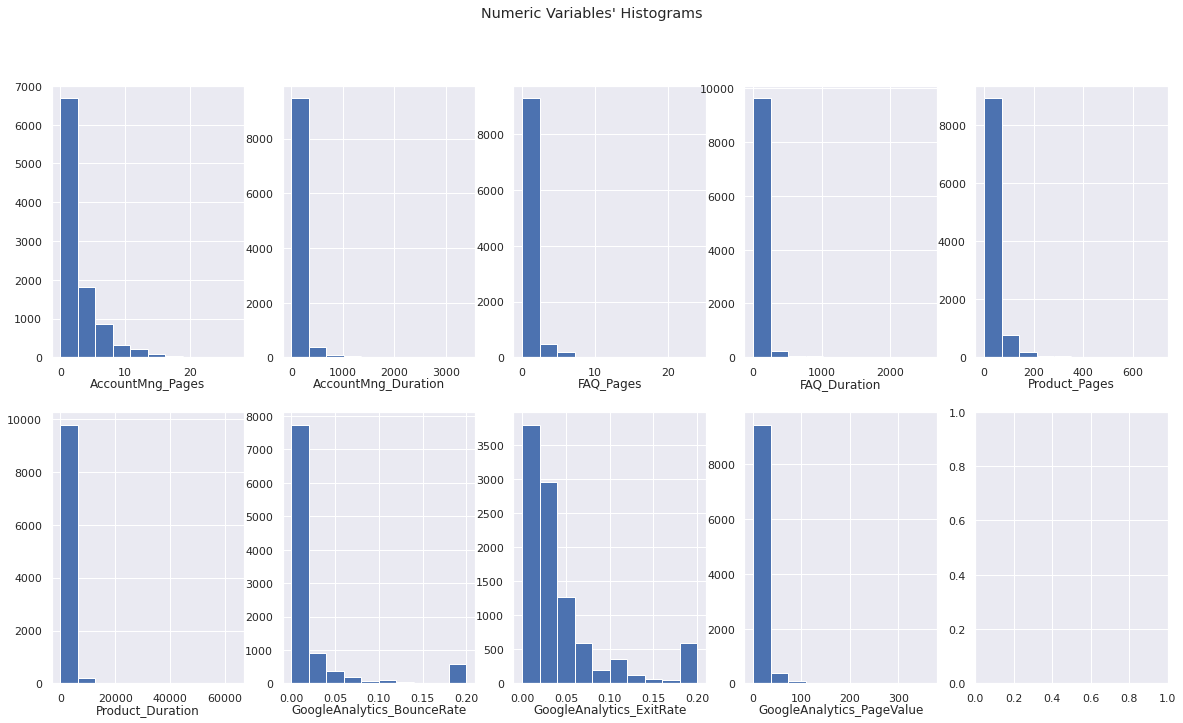

In [9]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

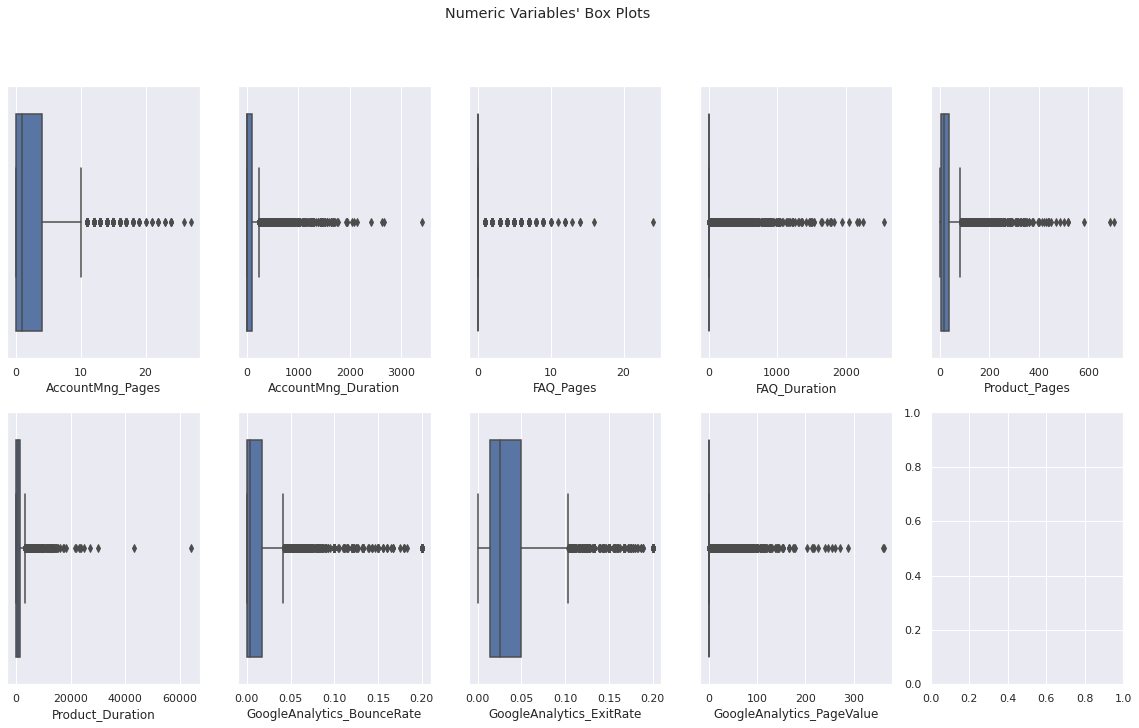

In [10]:
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

## Pairwise Relationship of Numerical Variables

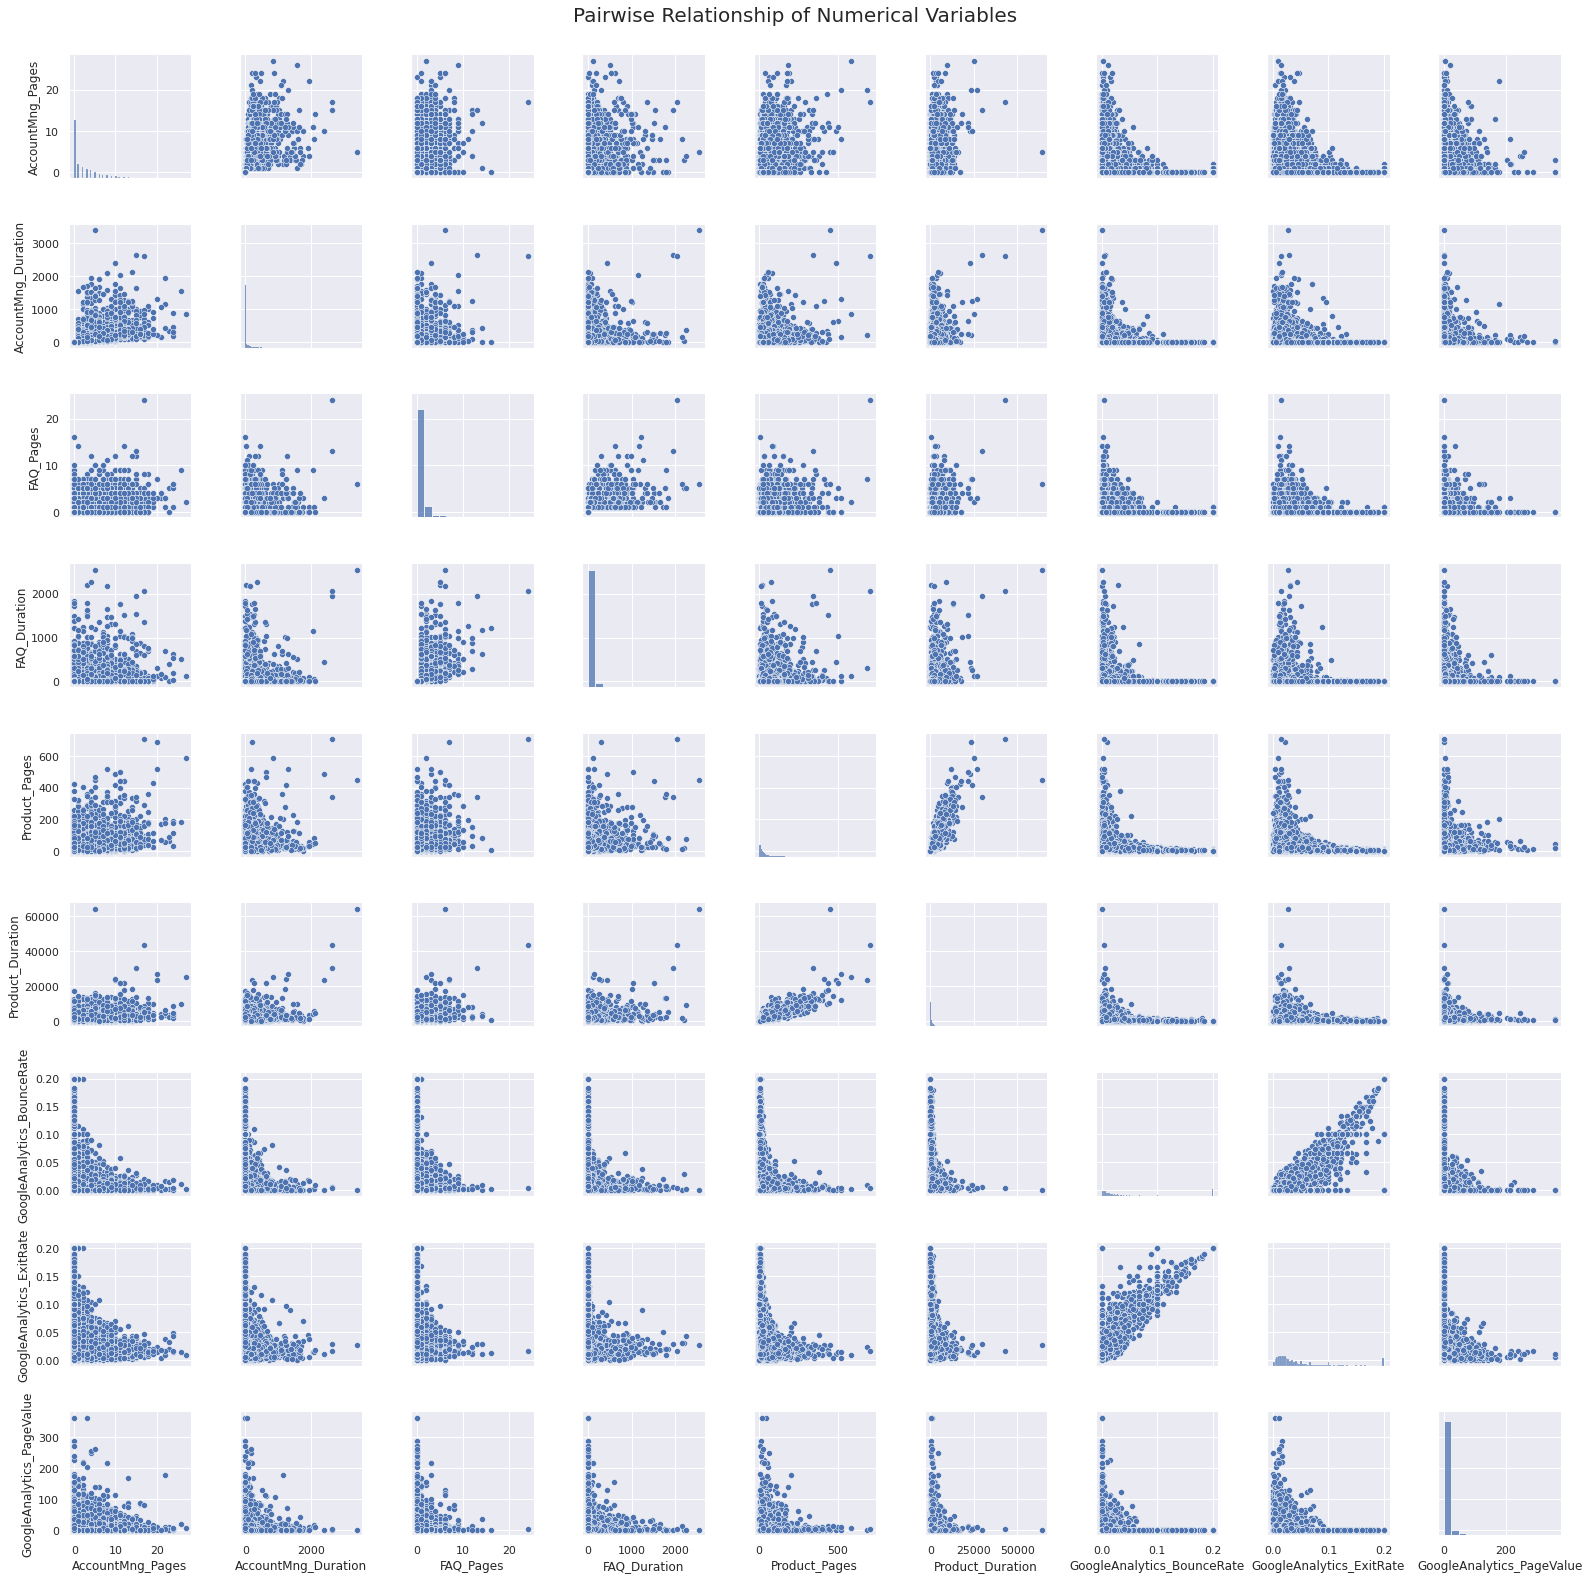

In [11]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features])

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

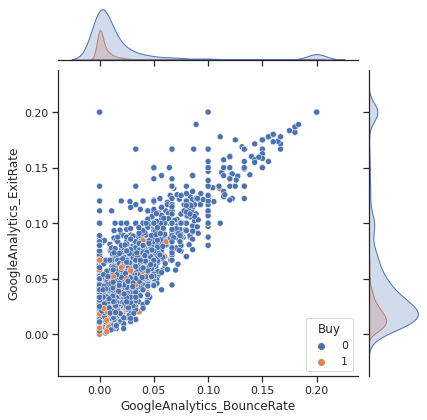

In [12]:
# Making the same visualization with customized formatting
sns.set(style="ticks")
sns.jointplot(data=df, x="GoogleAnalytics_BounceRate", y="GoogleAnalytics_ExitRate", hue="Buy")
plt.show()

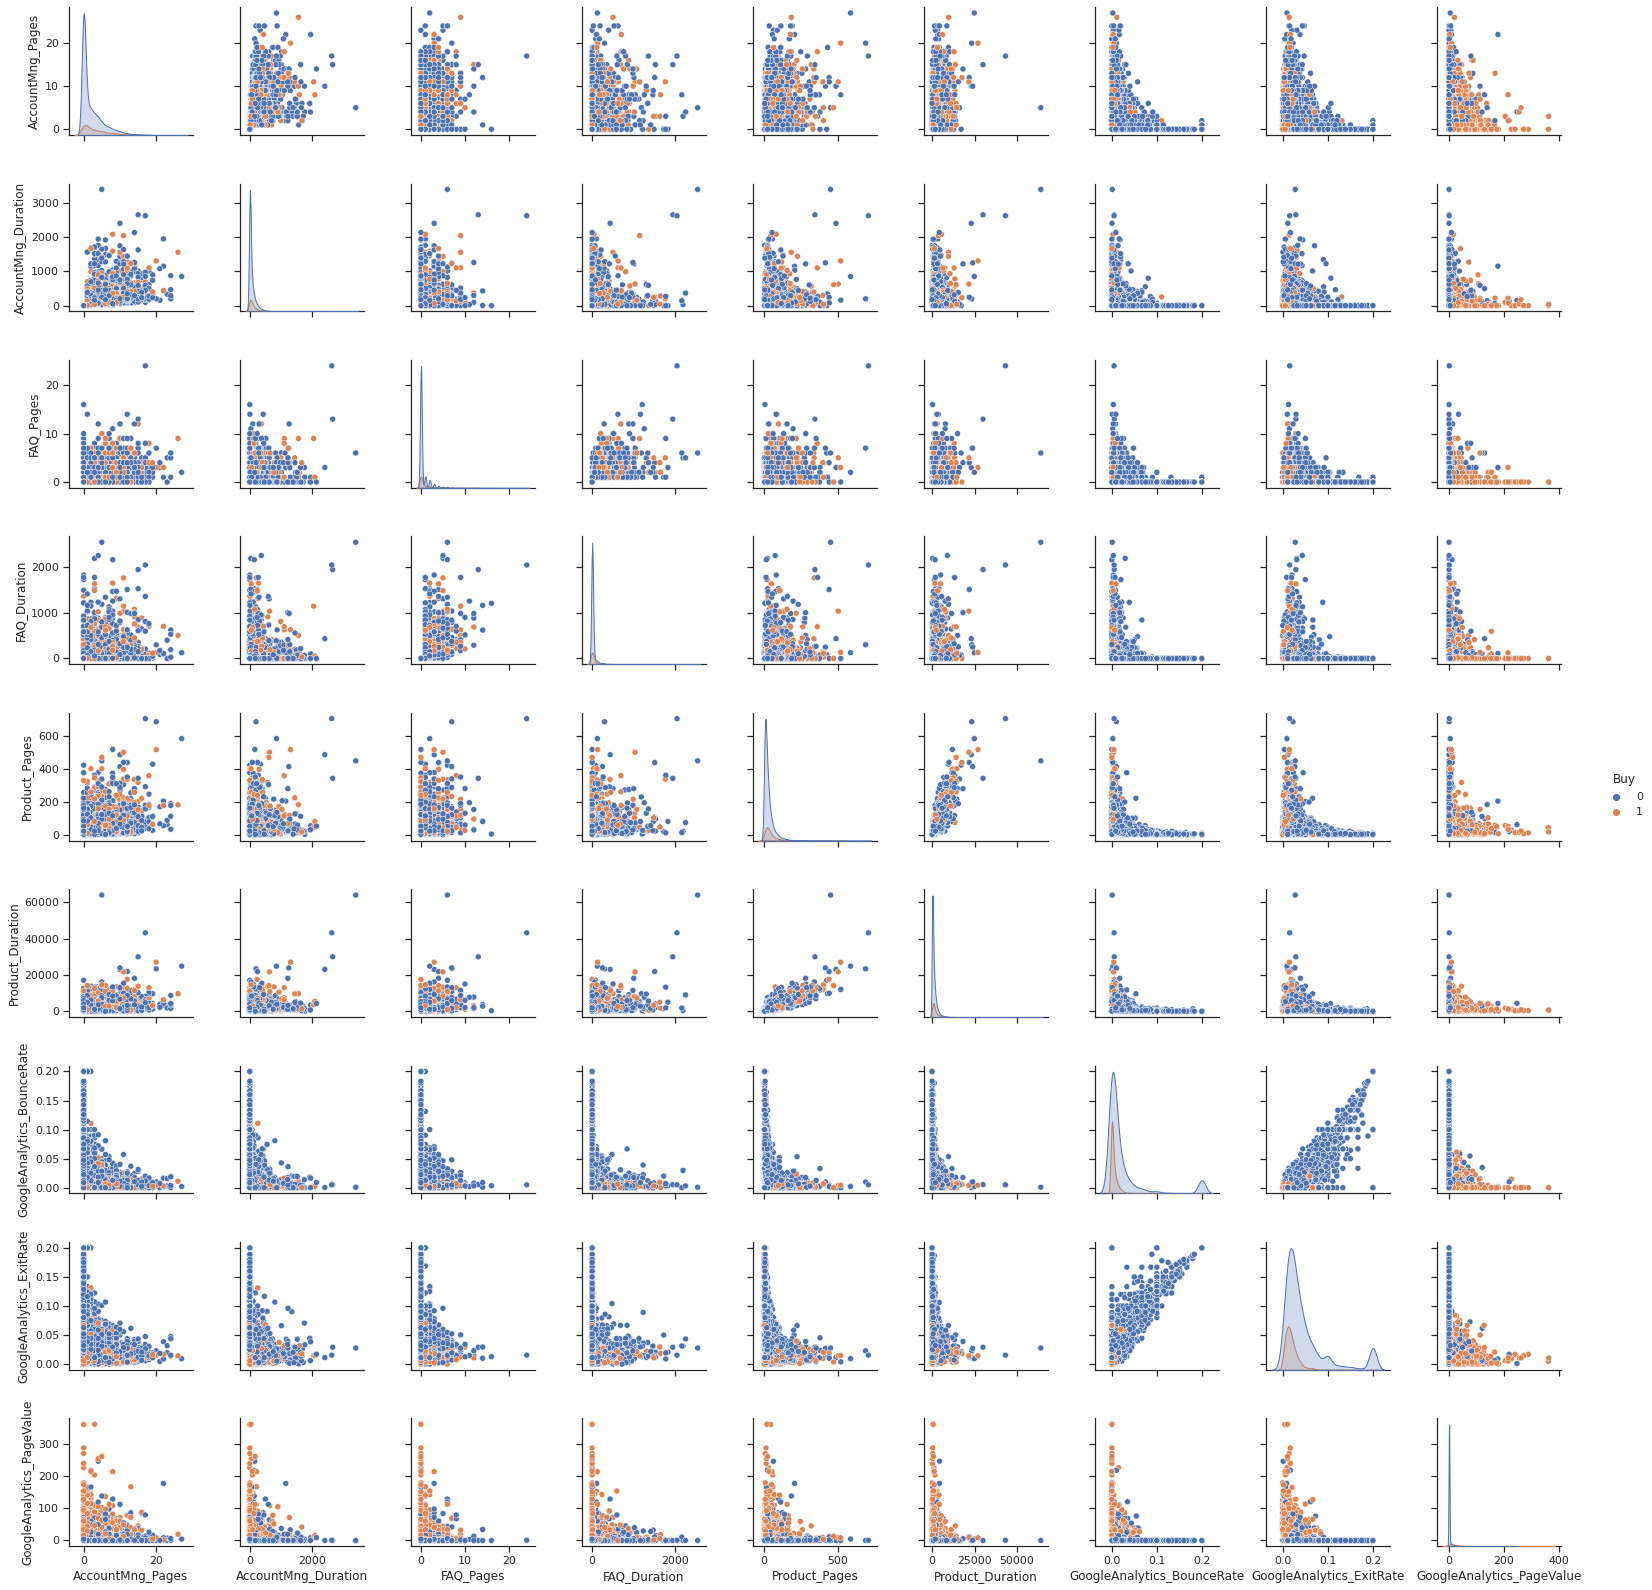

In [13]:
# Changing the view per Buy
non_metric_feat = ['Date', 'OS',	'Browser',	'Country',	'Type_of_Traffic',	'Type_of_Visitor']
metric_feat = df.columns.drop(non_metric_feat).to_list()

sns.set_theme(style="ticks")

sns.pairplot(df[metric_feat], hue="Buy")

plt.show()

## Categorical/Low Cardinality Variables' Absolute Frequencies

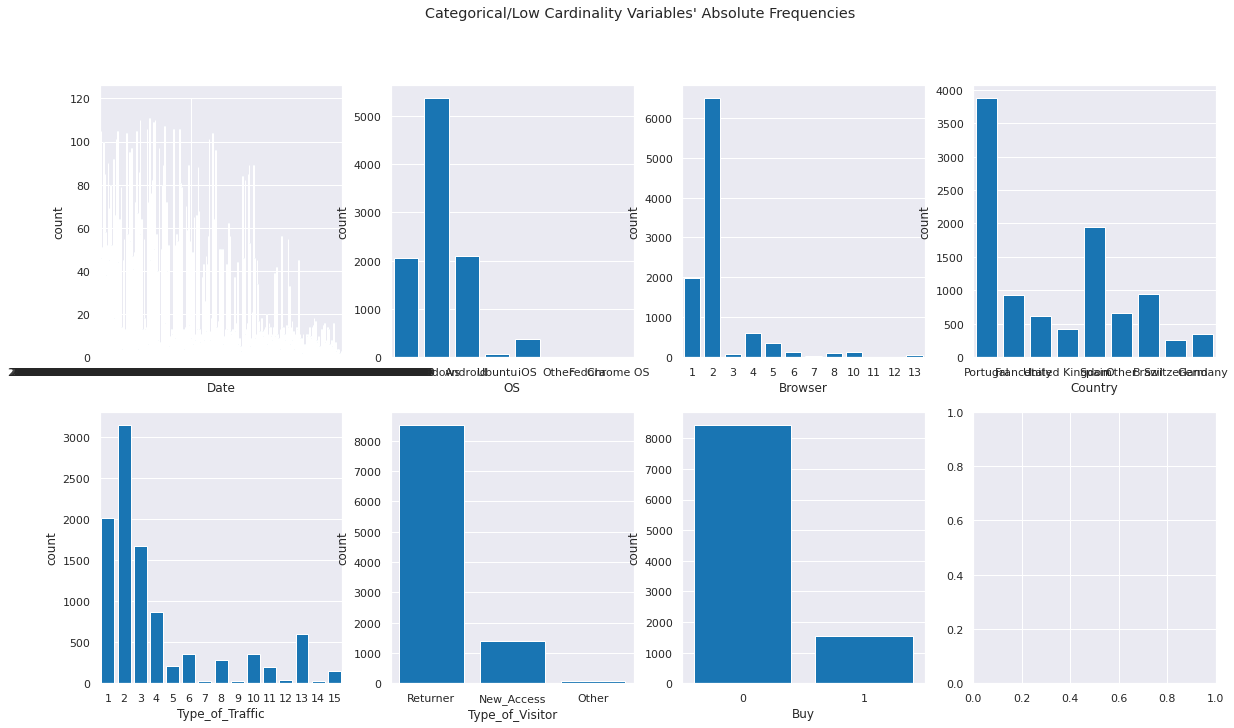

In [15]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(df[feat], ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.show()

## Metric Variables' Correlation Matrix

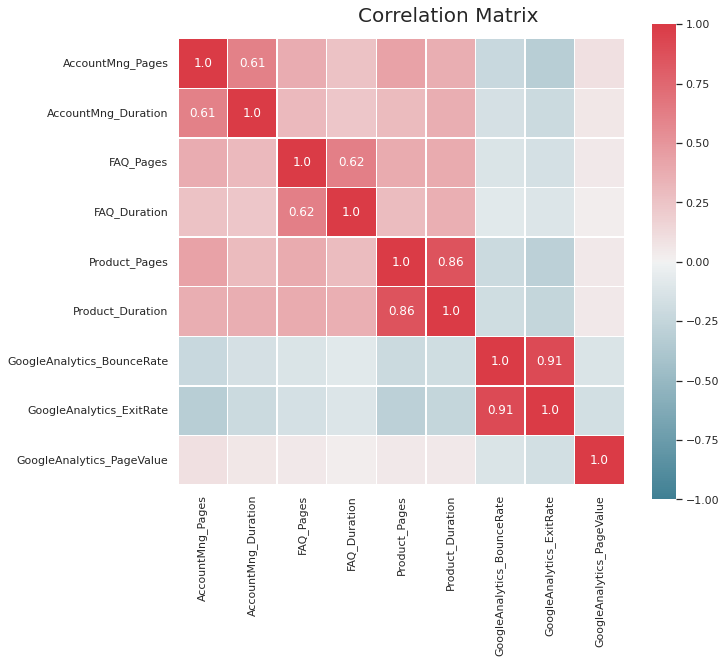

In [17]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

## Outlier removal

In [18]:
df[df['Buy']==1].describe().T

count         mean  ...         75%         max
AccountMng_Pages            1552.0     3.385954  ...     5.00000     26.0000
AccountMng_Duration         1552.0   120.885341  ...   150.45830   2086.7500
FAQ_Pages                   1552.0     0.784149  ...     1.00000     12.0000
FAQ_Duration                1552.0    56.575406  ...    18.00000   1767.6667
Product_Pages               1552.0    47.687500  ...    57.00000    517.0000
Product_Duration            1552.0  1866.943611  ...  2242.08085  27009.8594
GoogleAnalytics_BounceRate  1552.0     0.005053  ...     0.00630      0.2000
GoogleAnalytics_ExitRate    1552.0     0.019484  ...     0.02500      0.2000
GoogleAnalytics_PageValue   1552.0    27.250497  ...    38.84740    361.7637
Browser                     1552.0     2.436211  ...     2.00000     13.0000
Type_of_Traffic             1552.0     3.871134  ...     4.00000     15.0000
Buy                         1552.0     1.000000  ...     1.00000      1.0000

[12 rows x 8 columns]

In [19]:
filters1 = (
    (df['AccountMng_Duration']<=2000)
    &
    (df['FAQ_Duration']<=1500)
    &
    (df['Product_Pages']<=500)
    &
    (df['Product_Duration']<=25000)
    &
    (df['GoogleAnalytics_PageValue']<=300)
)

df_1 = df[filters1]

print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9973


In [20]:
df = df[filters1]

## Feature extraction

In [21]:
df['month'] = df['Date'].dt.month

## One Hot encoding

In [22]:
df = pd.concat([df,pd.get_dummies(df['OS'], prefix='OS_',dummy_na=True)],axis=1).drop(['OS'],axis=1)

df = pd.concat([df,pd.get_dummies(df['Country'], prefix='Country_',dummy_na=True)],axis=1).drop(['Country'],axis=1)

df = pd.concat([df,pd.get_dummies(df['Type_of_Visitor'], prefix='Type_of_Visitor_',dummy_na=True)],axis=1).drop(['Type_of_Visitor'],axis=1)

In [23]:
df.shape

(9972, 37)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 9998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         9972 non-null   datetime64[ns]
 1   AccountMng_Pages             9972 non-null   int64         
 2   AccountMng_Duration          9972 non-null   float64       
 3   FAQ_Pages                    9972 non-null   int64         
 4   FAQ_Duration                 9972 non-null   float64       
 5   Product_Pages                9972 non-null   int64         
 6   Product_Duration             9972 non-null   float64       
 7   GoogleAnalytics_BounceRate   9972 non-null   float64       
 8   GoogleAnalytics_ExitRate     9972 non-null   float64       
 9   GoogleAnalytics_PageValue    9972 non-null   float64       
 10  Browser                      9972 non-null   int64         
 11  Type_of_Traffic              9972 non-null 

## XGBoosting

In [25]:
encoded_x = df.drop(['Date','Buy'], axis=1)
label_encoded_y = df['Buy']

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [26]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.40%


In [27]:
# evaluate predictions
f1_score = f1_score(y_test, predictions)
print("f1_score: %.2f%%" % (f1_score * 100.0))

f1_score: 64.73%


Best Threshold=0.408317, F-Score=0.744


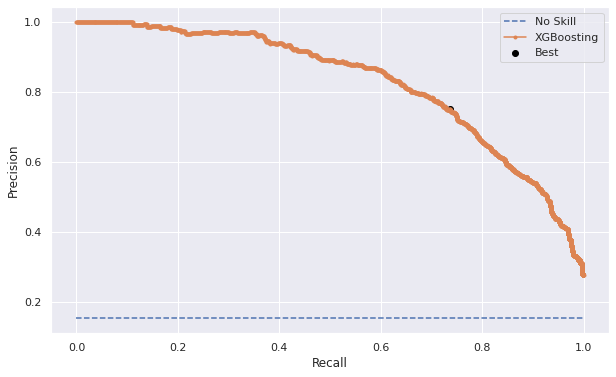

In [28]:
# Best Threshold

# predict probabilities
yhat = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate precision recall curves
precision, recall, thresholds = precision_recall_curve(y_train, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.figure(figsize=(10,6))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='XGBoosting')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot

plt.show()

Confusion Matrix - absolute values:
[[5389  254]
 [ 273  765]]


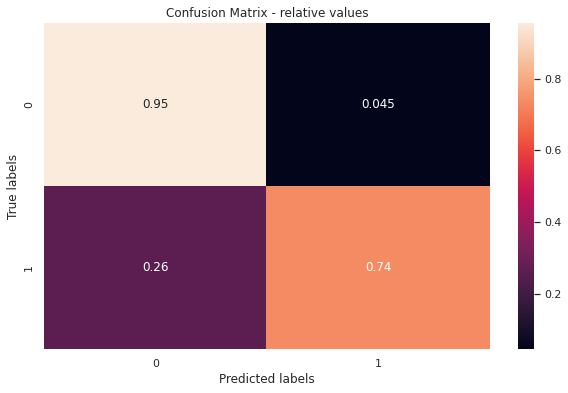

In [33]:
threshold = 0.408317
y_pred = (model.predict_proba(X_train)[:, 1] > threshold).astype('float')
confusion_matrix(y_train, y_pred)

print('Confusion Matrix - absolute values:')
print(confusion_matrix(y_train, y_pred))

plt.figure(figsize=(10,6))
cm = confusion_matrix(y_train, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix - relative values'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [36]:
print('Classification Report:')
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5643
           1       0.75      0.74      0.74      1038

    accuracy                           0.92      6681
   macro avg       0.85      0.85      0.85      6681
weighted avg       0.92      0.92      0.92      6681

